In [2]:
import xarray as xr
from pathlib import Path
from datetime import datetime, timedelta
import tempfile

# Setup
start_time = datetime(2025, 7, 3, 12)
end_time   = datetime(2025, 7, 5, 12)
base_path = Path("/psd2data/obsarchive/MRMS/1kmCONUS/2025")

# Temp directory to store .idx files
temp_idx_dir = Path(tempfile.gettempdir()) / "cfgrib_indexes"
temp_idx_dir.mkdir(parents=True, exist_ok=True)

# Collect paths
file_paths = []
current_time = start_time
while current_time <= end_time:
    doy = current_time.timetuple().tm_yday
    doy_path = base_path / f"{doy:03d}"
    fname = f"MultiSensorQPE01HPass1{current_time.strftime('%Y%m%d%H%M')}.grib2"
    fpath = doy_path / fname
    if fpath.exists():
        file_paths.append((fpath, current_time))
    else:
        print(f"Missing: {fpath}")
    current_time += timedelta(hours=1)

# Load and sum datasets
datasets = []

for fpath, ts in file_paths:
    print(f"📄 Reading: {fpath}")
    indexpath = temp_idx_dir / (fpath.name + ".idx")
    try:
        ds = xr.open_dataset(
            fpath,
            engine="cfgrib",
            backend_kwargs={"indexpath": str(indexpath)}
        )
        ds = ds.expand_dims(time=[ts])
        datasets.append(ds)
    except Exception as e:
        print(f"  ❌ Error reading {fpath.name}: {e}")

# Combine and sum
summed = xr.concat(datasets, dim="time").sum(dim="time")
print(summed)

📄 Reading: /psd2data/obsarchive/MRMS/1kmCONUS/2025/184/MultiSensorQPE01HPass1202507031200.grib2
📄 Reading: /psd2data/obsarchive/MRMS/1kmCONUS/2025/184/MultiSensorQPE01HPass1202507031300.grib2
📄 Reading: /psd2data/obsarchive/MRMS/1kmCONUS/2025/184/MultiSensorQPE01HPass1202507031400.grib2
📄 Reading: /psd2data/obsarchive/MRMS/1kmCONUS/2025/184/MultiSensorQPE01HPass1202507031500.grib2
📄 Reading: /psd2data/obsarchive/MRMS/1kmCONUS/2025/184/MultiSensorQPE01HPass1202507031600.grib2
📄 Reading: /psd2data/obsarchive/MRMS/1kmCONUS/2025/184/MultiSensorQPE01HPass1202507031700.grib2
📄 Reading: /psd2data/obsarchive/MRMS/1kmCONUS/2025/184/MultiSensorQPE01HPass1202507031800.grib2
📄 Reading: /psd2data/obsarchive/MRMS/1kmCONUS/2025/184/MultiSensorQPE01HPass1202507031900.grib2
📄 Reading: /psd2data/obsarchive/MRMS/1kmCONUS/2025/184/MultiSensorQPE01HPass1202507032000.grib2
📄 Reading: /psd2data/obsarchive/MRMS/1kmCONUS/2025/184/MultiSensorQPE01HPass1202507032100.grib2
📄 Reading: /psd2data/obsarchive/MRMS/1km

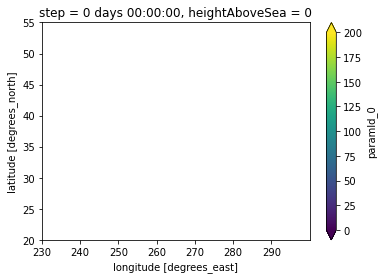

In [9]:
summed['paramId_0'].plot(vmin=0,vmax=200)

In [17]:
import numpy as np
np.max(ds['paramId_0'][0].values)



83.1

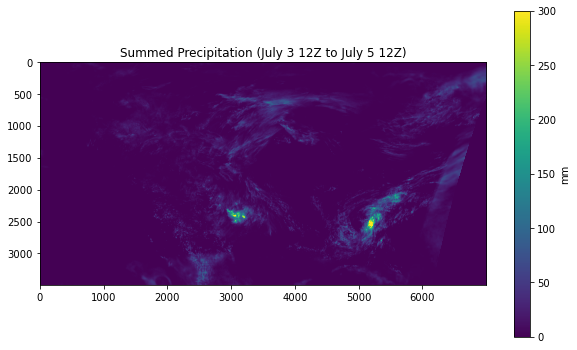

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(summed['paramId_0'].squeeze(), cmap='viridis', vmin=0, vmax=300)
plt.colorbar(label='mm')
plt.title('Summed Precipitation (July 3 12Z to July 5 12Z)')
plt.show()

In [25]:
# start_time = datetime(2025, 7, 3, 12)
# end_time   = datetime(2025, 7, 5, 12)
summed.to_netcdf('/Projects/HydroMet/currierw/TexasMRMS_2025070312_2025070512.nc')